In [16]:
from myBdd import *

Boolean Function: $ f(X_1, X_2, X_3) = X_1.X_2.X_3 + \overline{X_3}.X_4 + \overline{X_2}.X_4 $

The following cells display the BDDs for variable orderings of the Boolean function

1. $ X_2 < X_3 < X_4 < X_1 $
2. $ X_1 < X_2 < X_3 < X_4 $
3. $ X_2 < X_3 < X_1 < X_4 $

In [17]:
f = boolfunc.Expression(
    r"input\1.pcn")
print(f)

4
3
3 1 2 3
2 -2 4
2 -3 4


In [18]:
ordering = [2,3,4,1]
print(ordering)
a = BDD(f, ordering)
a

[2, 3, 4, 1]


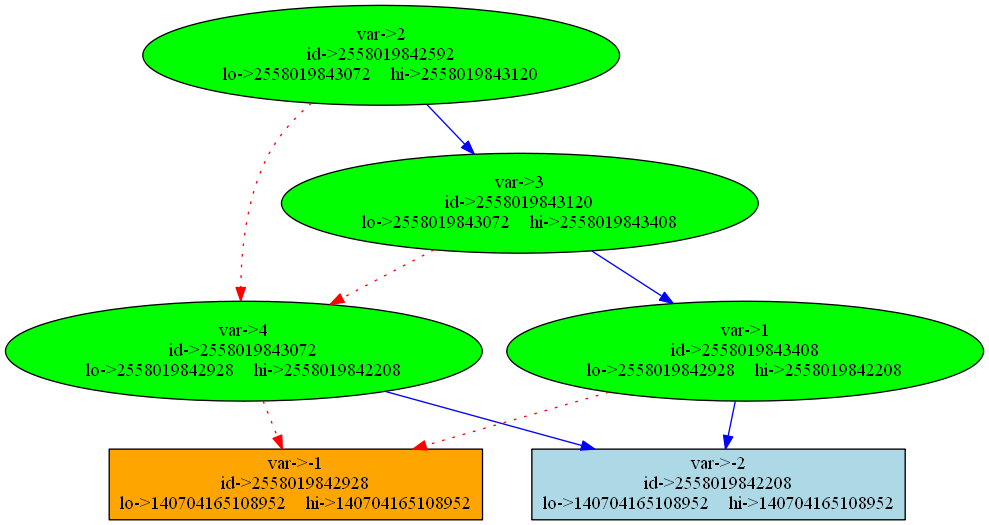

In [19]:
a.displayGraph()

[1, 2, 3, 4]


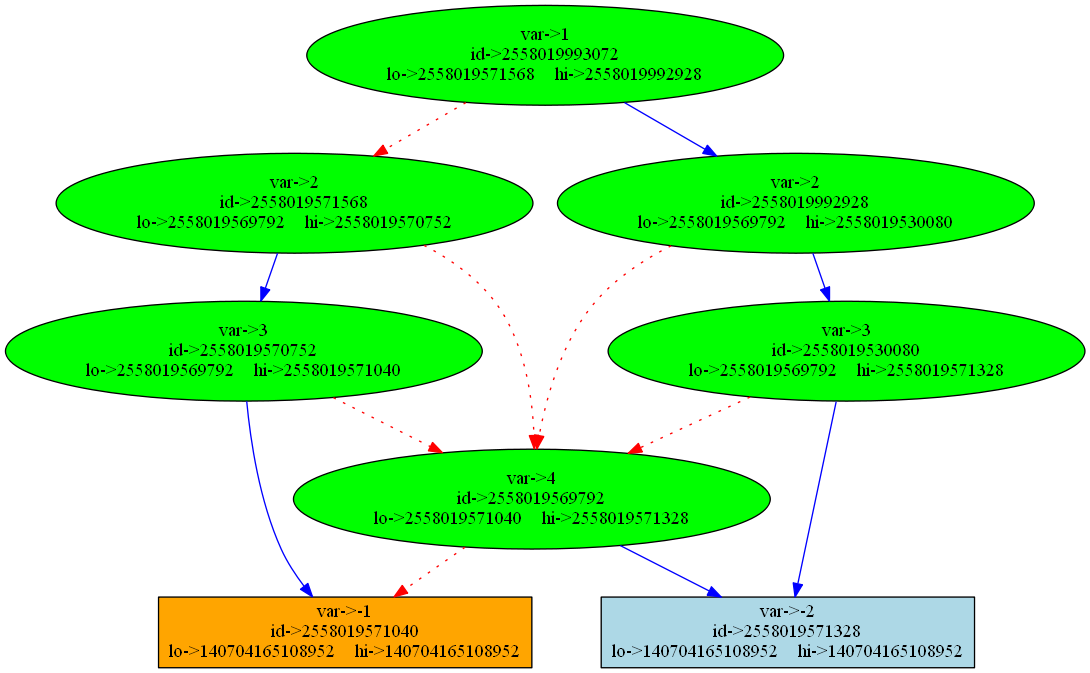

In [20]:
ordering = [1,2,3,4]
print(ordering)
a = BDD(f, ordering)
a.displayGraph()

[2, 3, 1, 4]


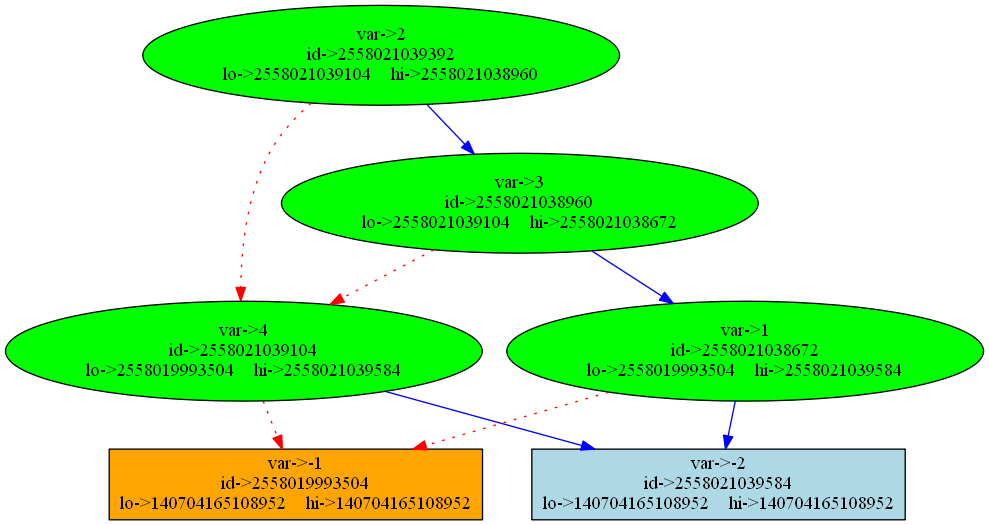

In [21]:
ordering = [2, 3, 1, 4]
print(ordering)
a = BDD(f, ordering)
a.displayGraph()

Boolean Function:
$ f(X_1, X_2,..., X_8) = X_1.X_2 + X3.X_4 + X_5.X_6 + X_7.X_8 $

Variable Orderings:
1. $ X_1 < X_3 < X_5 < X_7 < X_2 < X_4 < X_6 < X_8 $
2. $ X_1 < X_2 < X_3 < X_4 < X_5 < X_6 < X_7 < X_8 $

In [22]:
f = boolfunc.Expression(
    r"input\2.pcn")
print(f)

8
4
2 1 2
2 7 8
2 3 4
2 5 6


[1, 3, 5, 7, 2, 4, 6, 8]


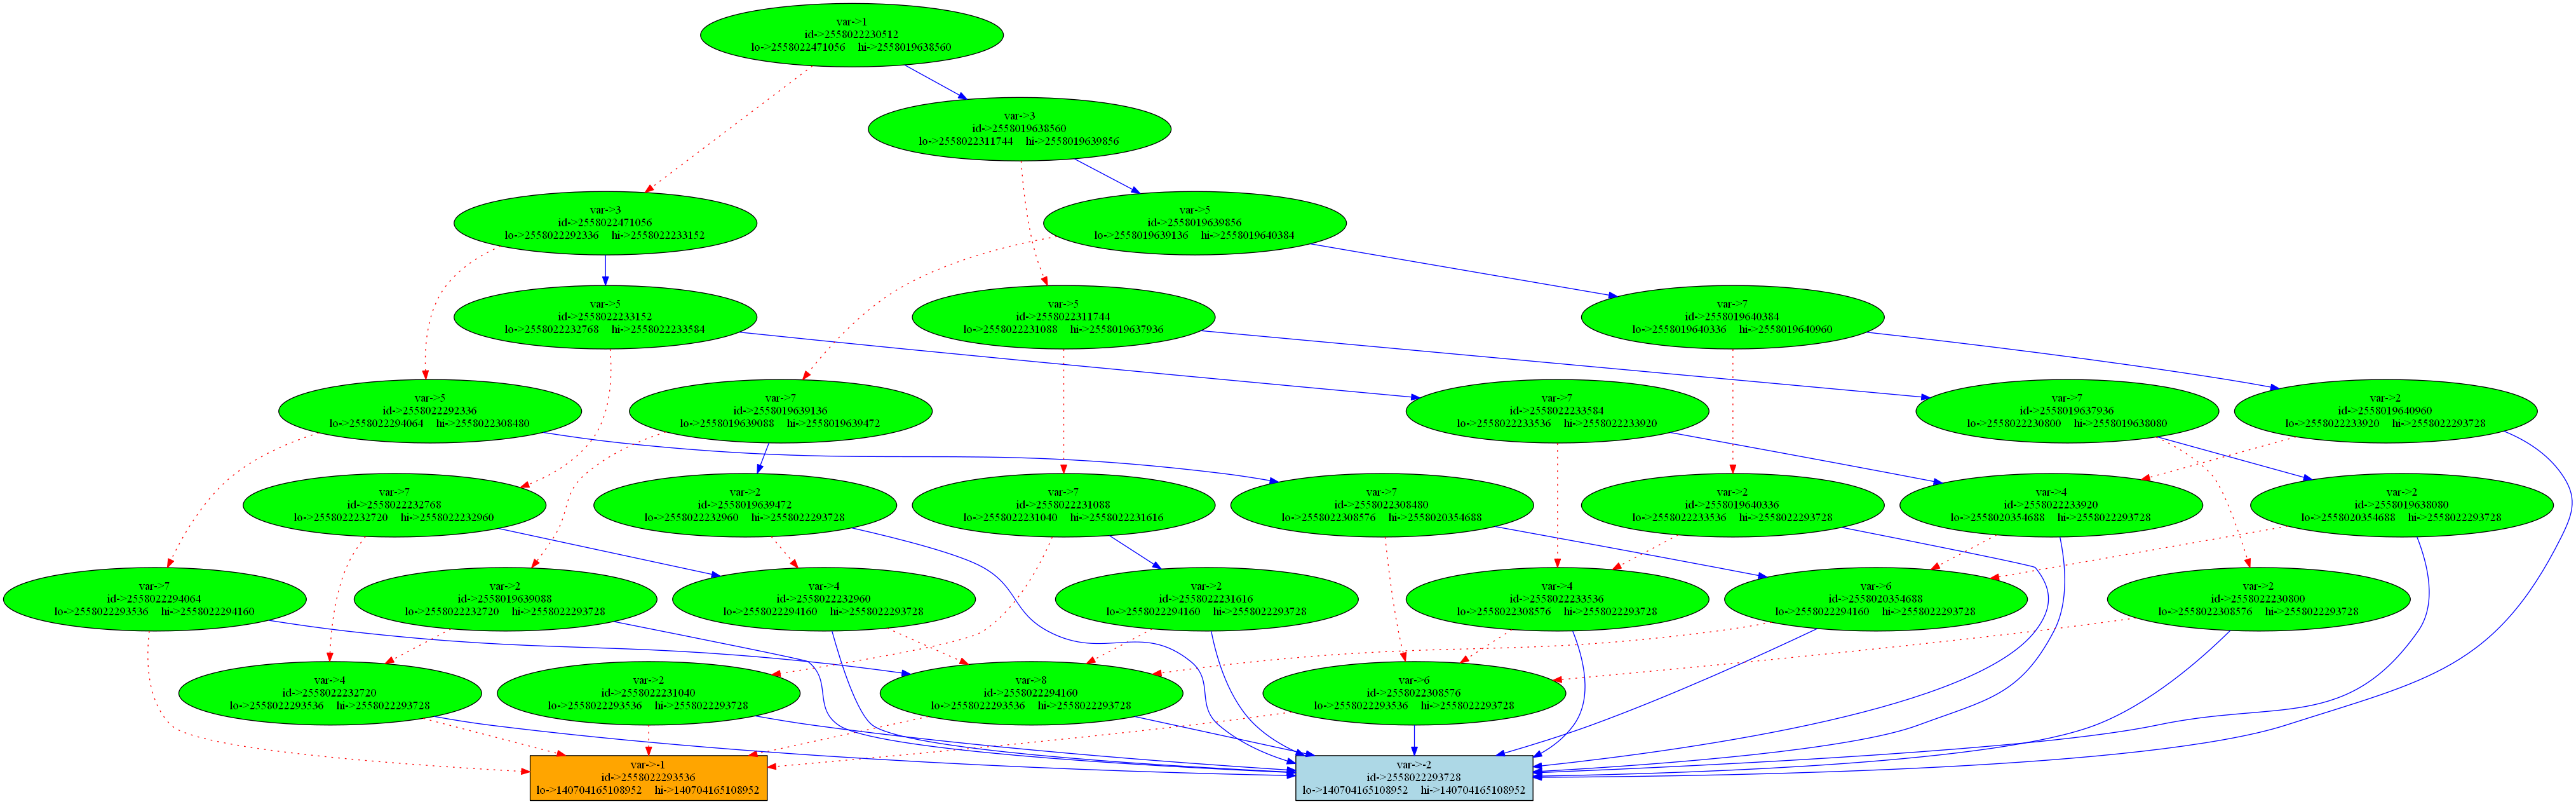

In [23]:
ordering = [1,3,5,7,2,4,6,8]
print(ordering)
a = BDD(f, ordering)
a.displayGraph()

[1, 2, 3, 4, 5, 6, 7, 8]


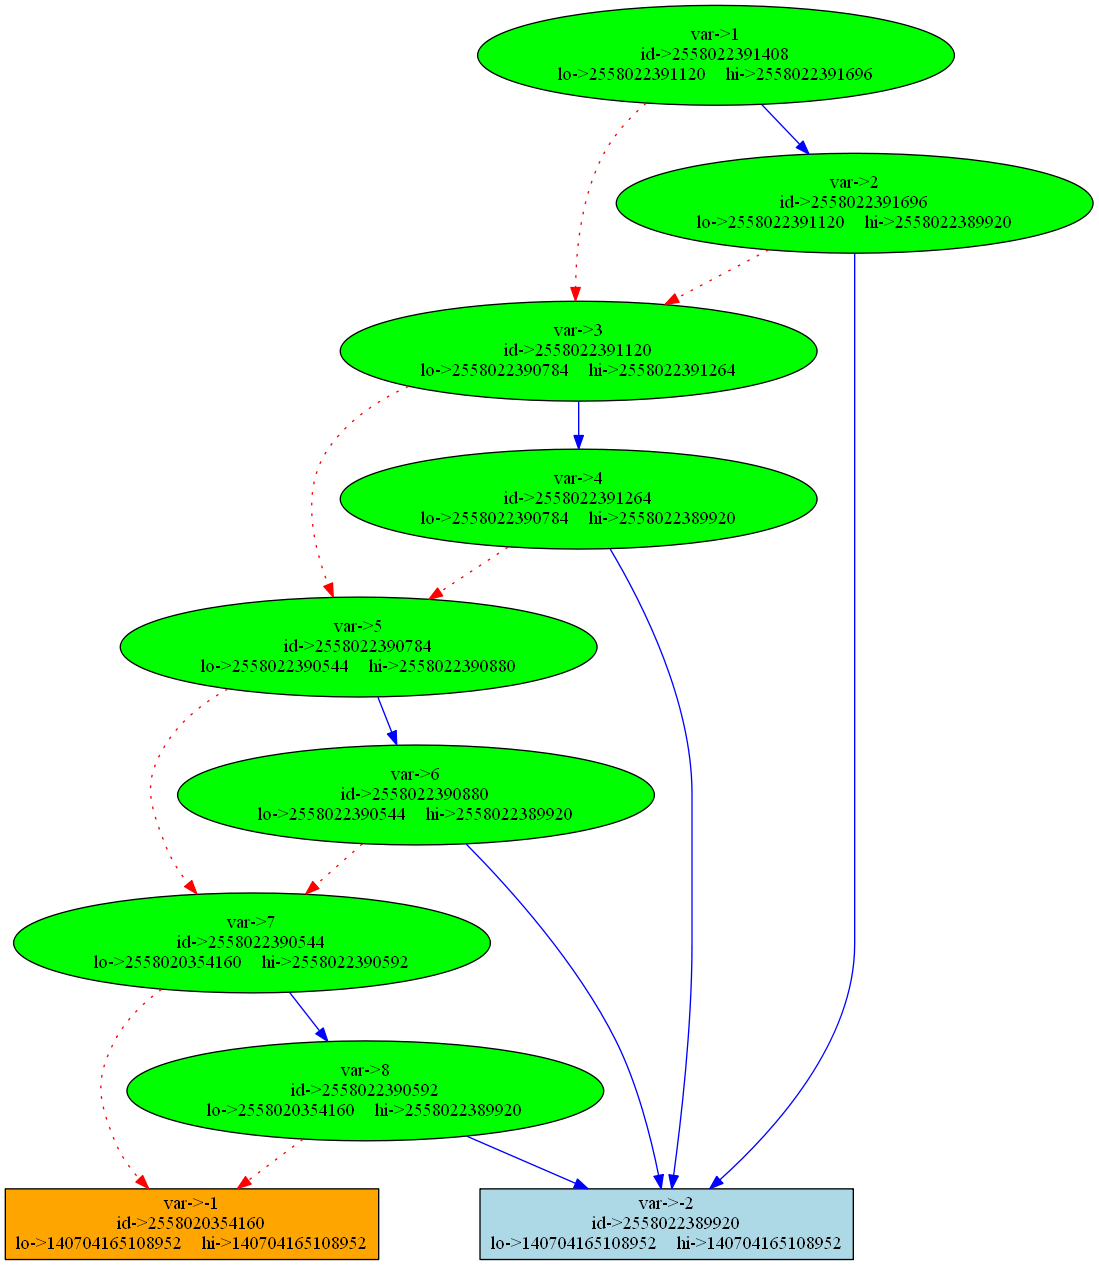

In [24]:
ordering = [1,2,3,4,5,6,7,8]
print(ordering)
a = BDD(f, ordering)
a.displayGraph()